## 영상정보처리 7주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 10점 

이름: 김경민       
학번: 32200327


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week7/
!pwd

Mounted at /gdrive
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week5
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week5


다음의 경로는 변경하지 말것

In [2]:
image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg' 

##문제 1:


1. 주어진 영상을 grayscale 로 읽어 들인다 (org_img)
2. 입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 소스코드 color_map_custom_key_colors.py를 참조하여, 자신이 원하는대로 컬러맵을 5개의 값을 이용해 만든다.  
4. 소스코드 color_map_custom_legend.py를 참조하여, Legend를 만든 후 "Legend"라는 타이틀을 부여한 후 출력한다. 
5. 만들어진 컬러맵을 LUT(), applyColorMap()을 이용해 컬러맵을 주어진 영상에 적용해서 두 개의 이미지의 타이틀을 각각 "LUT() Application", "applyColorMap() Application" 로 한 다음 출력한다. 





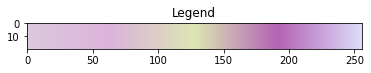

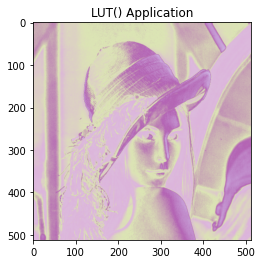

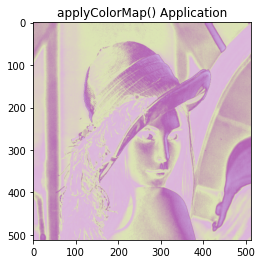

In [54]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np


org_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
new_img = np.zeros((org_img.shape[0],org_img.shape[1],3),np.uint8) 

## 기준 칼라 지정
custom_color = ((0, (220, 200, 220)), (0.25, (220, 180, 220)), (0.5, (220, 230, 180)),
                                        (0.75, (180, 100, 180)), (1.0, (220, 220, 250))) 

## lookup table(칼라맵 만들기)
lut = np.empty(shape=(256, 3), dtype=np.uint8)
max = 256

lastval, lastcol = custom_color[0]
#print(lastval) -> 0
#print(lastcol) -> (220,200,220)
for step, col in custom_color[1:]:
      val = int(step * max)  # 256의 0.25 지점, 0.5 지점....
      for i in range(3):
          lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)  # 균등분포 # start~end 는 각 지점의 RGB 값 # Num은 256*0.250 - 0 개 만큼
          #위의 custom_color에서는 256dml 0, 0.25, 0.5... 지점을 정해줬고, 균등분포 함수를 사용해 0부터 256의 0.25지점 사시의 칼라를 계산해준다.

      lastcol = col
      lastval = val


## 칼라맵 legend 만들기
legend_image = np.repeat(lut[np.newaxis, ...], 20, axis=0)
plt.imshow(legend_image)
plt.title("Legend")
plt.show()

## LUT() Application
for i in range(3):
        new_img[..., i] = cv2.LUT(org_img, lut[:, i])
plt.imshow(new_img)
plt.title("LUT() Application")
plt.show()



## applyColorMap() Application
lut2 = np.reshape(lut, (256, 1, 3))
new_img = cv2.applyColorMap(org_img,lut2)  
plt.imshow(new_img)
plt.title("applyColorMap() Application")
plt.show()


